# Importation

In [1]:
import face_recognition as face_rec
import cv2
import matplotlib.pyplot as plt

# load resource

In [2]:
obama1 = face_rec.load_image_file('rsc/obama01.jpeg')
obama2 = face_rec.load_image_file('rsc/obama02.jpg')
tu1 = face_rec.load_image_file('rsc/tu01.jpg')

# Encoding

In [3]:
obama_face_encoding = face_rec.face_encodings(obama1)[0]

In [4]:
known_faces_name = ['obama']
known_face_encoding = [obama_face_encoding]

# Find Face

In [18]:
test_image = tu1
small_test_image = cv2.resize(test_image, (0,0), fx=0.25, fy=0.25)
rgb_small_test_image = small_test_image[:,:,::-1]

In [19]:
face_locations = face_rec.face_locations(rgb_small_test_image)
face_encodings = face_rec.face_encodings(rgb_small_test_image, face_locations)

In [20]:
face_names=[]
for face_encoding in face_encodings:
    matches = face_rec.compare_faces(known_face_encoding, face_encoding)
    name="Unknown"
    if True in matches:
        first_matches_index = matches.index(True)
        name = known_faces_name[first_matches_index]
    face_names.append(name)

# Plotting

In [21]:
for (top, right, bottom, left), name in zip(face_locations, face_names):
    top*=4
    right*=4
    bottom*=4
    left*=4
    cv2.rectangle(test_image, (left, top), (right, bottom), (255,0,0),2)
    cv2.rectangle(test_image, (left,bottom-35), (right,bottom), (255,0,0), cv2.FILLED)
    font = cv2.FONT_HERSHEY_TRIPLEX
    cv2.putText(test_image, name, (left+6, bottom-6), font, 1.0, (255,255,255),1)

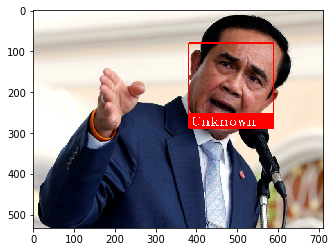

In [22]:
plt.imshow(test_image)